In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('gurgoan_properties_outlier_treated.csv')

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,...,NaN,1017.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0,575.666667
1,flat,tulip violet,sector 69,1.43,8888.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0,536.333333
2,flat,indiabulls centrum park,sector 103,2.45,8522.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,...,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,38.0,718.750000
3,house,my home,new sector 2,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,...,270.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22.0,135.000000
4,house,ansals palam vihar,sector 2,5.70,14729.0,3870.0,Plot area 430(359.53 sq.m.)Built Up area: 4550...,5.0,5.0,2,...,4550.0,4450.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0,774.000000


In [6]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                692
facing                  991
agePossession             0
noOfFloor              2821
super_built_up_area    1624
built_up_area          2394
carpet_area            1658
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

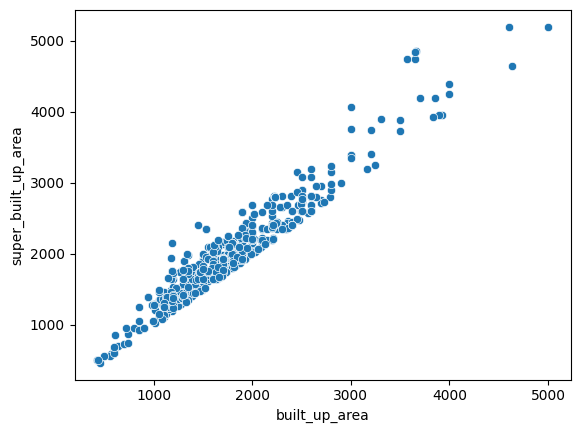

In [9]:
sns.scatterplot(data = df, x = 'built_up_area', y = 'super_built_up_area')

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

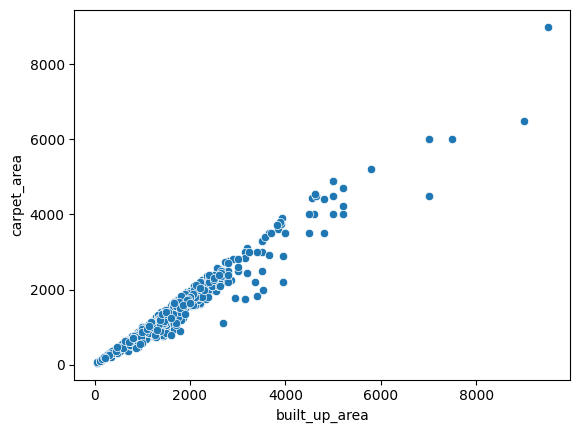

In [10]:
sns.scatterplot(data = df, x = 'built_up_area', y = 'carpet_area')

In [11]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3491    False
3492    False
3493    False
3494     True
3495     True
Length: 3496, dtype: bool

In [12]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [13]:
all_present_df.shape

(530, 25)

In [14]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [15]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [16]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1063474025974025 0.900140056022409


In [17]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [18]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ireo the corridors,sector 67a,1.62,9380.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3.0,3.0,2,...,NaN,1017.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0,575.666667
10,flat,shapoorji pallonji joyville gurugram,sector 102,1.40,10378.0,1349.0,Super Built up area 1349(125.33 sq.m.)Carpet a...,2.0,2.0,2,...,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,674.500000
43,flat,corona optus,sector 37c,1.43,7186.0,1990.0,Super Built up area 1990(184.88 sq.m.)Carpet a...,3.0,3.0,3+,...,NaN,1700.0,1.0,1.0,0.0,0.0,1.0,0.0,49.0,663.333333
47,flat,shree vardhman flora,sector 90,0.85,4404.0,1930.0,Super Built up area 1930(179.3 sq.m.)Carpet ar...,3.0,4.0,3,...,NaN,1450.0,0.0,1.0,1.0,0.0,0.0,0.0,110.0,643.333333
48,flat,satya the hermitage,sector 103,1.12,5625.0,1991.0,Super Built up area 1991(184.97 sq.m.)Carpet a...,3.0,4.0,3+,...,NaN,1500.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,663.666667


In [19]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15160\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15160\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [20]:
df.update(sbc_df)

In [21]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                692
facing                  991
agePossession             0
noOfFloor              2821
super_built_up_area    1624
built_up_area          1973
carpet_area            1658
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [22]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [23]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,tulip violet,sector 69,1.43,8888.0,1609.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0,536.333333
2,flat,indiabulls centrum park,sector 103,2.45,8522.0,2875.0,Super Built up area 2875(267.1 sq.m.),4.0,4.0,3,...,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,38.0,718.750000
6,flat,ireo the corridors,sector 67a,2.00,11429.0,1750.0,Super Built up area 1750(162.58 sq.m.),3.0,3.0,3,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,38.0,583.333333
12,flat,m3m heights,sector 65,2.79,14170.0,1969.0,Super Built up area 1828(169.83 sq.m.),3.0,3.0,3,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,15.0,656.333333
13,flat,godrej,sector 79,1.29,8206.0,1572.0,Super Built up area 1572(146.04 sq.m.),2.0,2.0,3,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,786.000000


In [24]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15160\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15160\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(r

In [25]:
df.update(sb_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                692
facing                  991
agePossession             0
noOfFloor              2821
super_built_up_area    1624
built_up_area          1100
carpet_area            1658
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [27]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [28]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
16,flat,m3m golfestate,sector 65,6.15,15999.0,3844.0,Carpet area: 3844 (357.12 sq.m.),3.0,5.0,3+,...,NaN,3844.0,0.0,1.0,0.0,0.0,0.0,2.0,49.0,1281.333333
17,flat,signature global city 63a,sector 63a,1.55,14776.0,1049.0,Carpet area: 1050 (97.55 sq.m.),2.0,2.0,2,...,NaN,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,524.500000
21,flat,smart world gems,sector 89,1.13,8503.0,1329.0,Carpet area: 1326 (123.19 sq.m.),3.0,3.0,2,...,NaN,1326.0,1.0,0.0,0.0,0.0,0.0,0.0,115.0,443.000000
25,flat,pyramid urban homes 2,sector 86,0.41,8283.0,495.0,Carpet area: 501 (46.54 sq.m.),2.0,2.0,1,...,NaN,501.0,1.0,1.0,0.0,1.0,1.0,0.0,49.0,247.500000
29,flat,smart world gems,sector 89,1.00,9009.0,1110.0,Carpet area: 1110 (103.12 sq.m.),2.0,2.0,3,...,NaN,1110.0,1.0,0.0,0.0,0.0,1.0,0.0,99.0,555.000000


In [29]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15160\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15160\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['ca

In [30]:
df.update(c_df)

In [31]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                692
facing                  991
agePossession             0
noOfFloor              2821
super_built_up_area    1624
built_up_area           423
carpet_area            1658
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

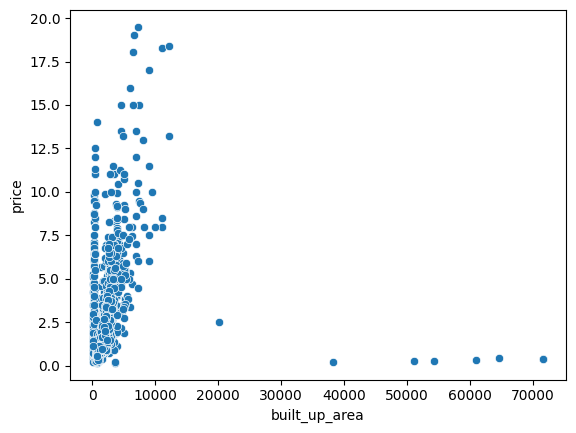

In [33]:
sns.scatterplot(data = df, x = 'built_up_area', y = 'price')

In [34]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [35]:
anamoly_df.sample(5)

,price,area,built_up_area
3337,2.7,2576.0,1891.0
2296,5.5,3240.0,355.0
1092,3.5,1975.0,1787.0
2886,6.4,3150.0,349.0
3121,6.5,3240.0,360.0


In [36]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [37]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

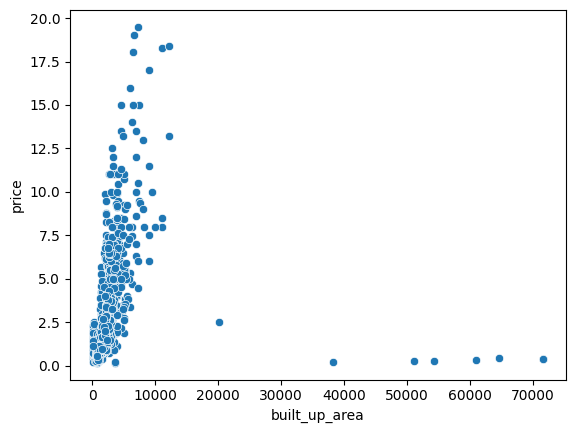

In [38]:
sns.scatterplot(data = df, x = 'built_up_area', y = 'price')

In [39]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [40]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo the corridors,sector 67a,1.62,9380.0,3.0,3.0,2,4.0,North,New Property,NaN,1346.0,0.0,0.0,1.0,0.0,0.0,1.0,142.0
1,flat,tulip violet,sector 69,1.43,8888.0,3.0,3.0,2,1.0,North-West,Relatively New,NaN,1455.0,0.0,0.0,0.0,1.0,0.0,0.0,86.0
2,flat,indiabulls centrum park,sector 103,2.45,8522.0,4.0,4.0,3,11.0,East,Relatively New,NaN,2602.0,1.0,1.0,1.0,1.0,0.0,0.0,38.0
3,house,my home,new sector 2,0.34,12593.0,2.0,2.0,2,NaN,West,Moderately Old,3.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,house,ansals palam vihar,sector 2,5.70,14729.0,5.0,5.0,2,NaN,North-East,Old Property,2.0,4550.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0


In [41]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum            692
facing              991
agePossession         0
noOfFloor          2821
built_up_area       423
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [42]:
df.drop(columns=['noOfFloor'],inplace=True)

In [43]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum           692
facing             991
agePossession        0
built_up_area      423
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

# floorNum

In [44]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,house,my home,new sector 2,0.34,12593.0,2.0,2.0,2,NaN,West,Moderately Old,270.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,house,ansals palam vihar,sector 2,5.70,14729.0,5.0,5.0,2,NaN,North-East,Old Property,4550.0,0.0,0.0,0.0,1.0,0.0,2.0,94.0
8,house,independent,sector 28,4.50,13889.0,4.0,4.0,0,NaN,NaN,Undefined,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,house,independent,sector 57,8.31,24171.0,5.0,6.0,3+,NaN,North-East,Old Property,3438.0,1.0,1.0,1.0,1.0,0.0,0.0,34.0
31,house,tata primanti,sector 72,8.60,12286.0,4.0,5.0,3+,NaN,NaN,Relatively New,7000.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,house,independent,sector 9,3.40,12938.0,9.0,9.0,3,NaN,West,Moderately Old,NaN,0.0,0.0,0.0,0.0,0.0,1.0,61.0
3486,house,independent,sector 3,0.55,6707.0,2.0,2.0,1,NaN,South-East,Moderately Old,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3491,house,dlf the arbour,sector 63,8.50,21519.0,4.0,4.0,3+,NaN,NaN,Undefined,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
3494,house,independent,sector 14,7.50,16600.0,3.0,3.0,2,NaN,West,Old Property,NaN,1.0,1.0,0.0,1.0,0.0,1.0,27.0


In [48]:
df['floorNum'].median()

np.float64(7.0)

In [49]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15160\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [50]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing             991
agePossession        0
built_up_area      423
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [51]:
991/df.shape[0]

0.283466819221968

# facing

<Axes: ylabel='count'>

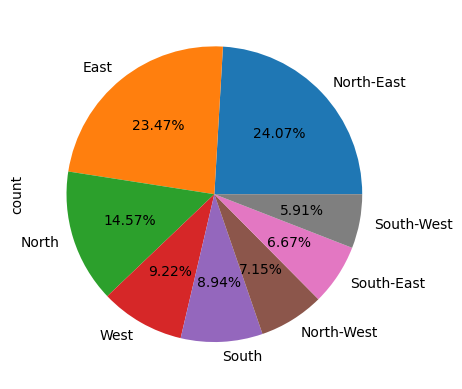

In [52]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [53]:
df.drop(columns=['facing'],inplace=True)

In [54]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
328,house,dlf new town heights,sector 86,2.50,7827.0,4.0,5.0,3+,2.0,Moderately Old,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0
2383,flat,supertech araville,sector 79,0.80,5267.0,2.0,2.0,2,12.0,New Property,1688.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0
99,flat,sare green parc 2,sector 92,0.61,4837.0,3.0,2.0,2,6.0,Under Construction,1141.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3462,house,independent,sector 2,6.00,24691.0,5.0,6.0,3+,2.0,Old Property,NaN,1.0,0.0,0.0,1.0,1.0,1.0,43.0
2971,house,unitech espace,sector 50,10.30,31790.0,5.0,6.0,3+,2.0,Moderately Old,NaN,1.0,1.0,1.0,1.0,0.0,1.0,160.0


In [55]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      423
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [56]:
df.drop(index=[2536],inplace=True)

In [57]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      423
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [61]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2365,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df.drop(index=[2365],inplace=True)

In [63]:
df.isnull().sum()

property_type        0
society              0
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      423
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

# agePossesion

In [64]:
df['agePossession'].value_counts()

agePossession
Relatively New        1595
New Property           553
Moderately Old         521
Undefined              287
Old Property           275
Under Construction     263
Name: count, dtype: int64

In [65]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
8,house,independent,sector 28,4.50,13889.0,4.0,4.0,0,2.0,Undefined,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,flat,gls arawali homes,sohna road,0.30,5291.0,2.0,2.0,0,10.0,Undefined,567.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,flat,vatika inxt floors,sector 82a,0.75,7500.0,2.0,2.0,2,1.0,Undefined,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,house,independent,sector 7,2.25,16892.0,5.0,3.0,0,2.0,Undefined,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,flat,krisumi waterfall residences,sector 36a,2.30,15551.0,2.0,2.0,2,23.0,Undefined,1479.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,flat,smart world gems,sector 89,0.88,7978.0,2.0,2.0,0,2.0,Undefined,1103.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3473,flat,m3m sky lofts,sector 71,1.00,11494.0,1.0,1.0,1,9.0,Undefined,869.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
3483,flat,raheja vedaanta,sector 108,1.50,5263.0,3.0,4.0,0,12.0,Undefined,2850.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3485,flat,ramsons kshitij,sector 95,0.30,3158.0,2.0,2.0,1,11.0,Undefined,950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [67]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [68]:
df['agePossession'].value_counts()

agePossession
Relatively New        1715
New Property           582
Moderately Old         554
Old Property           313
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [69]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [70]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [71]:
df['agePossession'].value_counts()

agePossession
Relatively New        1724
New Property           583
Moderately Old         557
Old Property           316
Under Construction     277
Undefined               37
Name: count, dtype: int64

In [72]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [73]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [74]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
Moderately Old         592
New Property           583
Old Property           316
Under Construction     277
Name: count, dtype: int64

In [75]:
df.isnull().sum()

property_type        0
society              0
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      423
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [78]:
df = df[~(df['built_up_area'].isnull())]

In [79]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [80]:
df.shape

(3071, 18)

In [81]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)